| **ID**             | **200021118**                                        |
| ------------------ | ---------------------------------------------------- |
| **Name**           | **Omar Faruk**                                       |
| **Course ID**      | **EEE 4710**                                         |
| **Course Name**    | **Artificial Intelligence and Machine Learning Lab** |
| **Assignment No.** | **3**                                                |

# Imports

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import shapefile as shp
import matplotlib.pyplot as plt



import os

# Import Data

In [3]:
data_path = os.path.join( ".." , "data" , "fatal-police-shootings-data.csv")
data = pd.read_csv(data_path)
data.head()

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23.0,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32.0,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39.0,male,H,not_available,False,False,473


# Data Analysis

Data types of the Columns

In [4]:
columns = pd.DataFrame(data.dtypes)
columns

,0
id,int64
date,object
threat_type,object
flee_status,object
armed_with,object
city,object
county,object
state,object
latitude,float64
longitude,float64


- **Numerical Data**

In [5]:
num_columns = columns[ (columns[0] == 'float64') | (columns[0] == 'int64') ]
num_columns

,0
id,int64
latitude,float64
longitude,float64
age,float64


- **Boolean Data**

In [6]:
bool_columns = columns[ (columns[0] == 'bool') ]
bool_columns

,0
was_mental_illness_related,bool
body_camera,bool


- **Ordinal Data**

In [7]:
object_columns = columns[ (columns[0] == 'object') ]
object_columns

,0
date,object
threat_type,object
flee_status,object
armed_with,object
city,object
county,object
state,object
location_precision,object
name,object
gender,object


## Numerical Data Analyze 

In [8]:
data.describe()

,id,latitude,longitude,age
count,10176.000000,9069.000000,9069.000000,9810.000000
mean,5584.564957,36.638398,-96.906487,37.445668
std,3162.727721,5.368841,16.374014,12.920570
min,3.000000,19.497503,-160.006944,2.000000
25%,2845.750000,33.451311,-111.967412,28.000000
50%,5615.500000,36.062099,-94.246525,35.000000
75%,8325.250000,40.042198,-83.133569,45.000000
max,11029.000000,71.301255,-67.867166,92.000000


## Boolean Data Analyze

In [9]:
data[bool_columns.index].describe()

,was_mental_illness_related,body_camera
count,10176,10176
unique,2,2
top,False,False
freq,8174,8425


## Object Data Analyze

In [10]:
data.describe(include='object')

,date,threat_type,flee_status,armed_with,city,county,state,location_precision,name,gender,race,race_source,agency_ids
count,10176,10107,8768,9965,10103,5484,10176,9069,9859,10154,9024,9046,10175
unique,3339,8,4,28,3685,967,51,7,9810,3,12,6,3805
top,2023-12-03,shoot,not,gun,Los Angeles,Los Angeles,CA,not_available,Michael Johnson,male,W,not_available,38
freq,10,2858,5477,5894,156,216,1381,7068,5,9698,4552,6193,141


### Analyze the Categorical Data

In [11]:
for id in object_columns.index:
    data[id].value_counts()
    display( pd.DataFrame(data[id].value_counts()) )

,count
date,
2023-12-03,10
2023-05-19,9
2021-11-28,9
2018-06-29,9
2020-05-26,9
...,...
2016-08-26,1
2018-08-10,1
2018-08-11,1


,count
threat_type,
shoot,2858
threat,2622
point,1844
attack,1458
move,586
undetermined,497
flee,189
accident,53


,count
flee_status,
not,5477
car,1593
foot,1322
other,376


,count
armed_with,
gun,5894
knife,1737
unarmed,557
undetermined,447
vehicle,363
replica,322
blunt_object,246
unknown,158
other,103


,count
city,
Los Angeles,156
Phoenix,125
Houston,123
San Antonio,100
Las Vegas,85
...,...
Trumann,1
Seville,1
Van Buren,1


,count
county,
Los Angeles,216
Maricopa,143
Harris,94
San Bernardino,78
Jefferson,77
...,...
Eastland,1
Owsley,1
Bandera,1


,count
state,
CA,1381
TX,984
FL,651
AZ,452
GA,386
CO,368
NC,301
OH,292
TN,284


,count
location_precision,
not_available,7068
block,775
address,588
intersection,520
road,62
poi_small,34
poi_large,22


,count
name,
Michael Johnson,5
Austin Flores,2
Timothy Johnson,2
Michael Ferguson,2
Justin Anderson,2
...,...
Sean Louis Justin,1
Christopher A. Wolfe,1
John Corneil,1


,count
gender,
male,9698
female,452
non-binary,4


,count
race,
W,4552
B,2423
H,1677
A,182
N,143
O,37
W;B,3
W;H,2
B;H,2


,count
race_source,
not_available,6193
photo,1389
public_record,1166
clip,254
other,22
undetermined,22


,count
agency_ids,
38,141
80,120
20,113
102,81
298,81
...,...
2399,1
2398,1
2394,1


#### Timestamp Data (Date & Time)

In [12]:
time_columns = object_columns.iloc[object_columns.index == 'date']
time_columns

,0
date,object


#### Multi Option Data

In [13]:
multi_colum = object_columns.iloc[
    (object_columns.index == 'armed_with') &
    (object_columns.index == 'race')
    ]
multi_colum

,0


#### Categorical Data

In [14]:
cat_columns = object_columns.iloc[
    (object_columns.index != 'date') & 
    (object_columns.index != 'armed_with') &
    (object_columns.index != 'name') &
    (object_columns.index != 'agency_ids') &
    (object_columns.index != 'race_source') &
    (object_columns.index != 'race')
    ]
cat_columns

,0
threat_type,object
flee_status,object
city,object
county,object
state,object
location_precision,object
gender,object


# Identify Issues in the Dataset

Here, 
- '**name**' , '**agency_id**' and '**race_source**' column is irrelevant for this Dataset Analysis. It should be dropped.
- '**date**' is a string it needs to convert to **Year** , **Month** , **Day** .
- '**armed_with**' and '**race** has multiple options. So, each option can added as **Boolean** columns and original column needs to be dropped.
- Others are pure categorical so, it need to converted to numerical.

## **count of null data**

In [15]:
pd.DataFrame(data.isnull().sum())

,0
id,0
date,0
threat_type,69
flee_status,1408
armed_with,211
city,73
county,4692
state,0
latitude,1107
longitude,1107


Here are lot of missing data. Let's assume them to be `unknown`

# Data Visualization

In [16]:
%matplotlib inline

Text(0.5, 1.0, 'Distribution of Arm Type in Police Shooting Incidents')

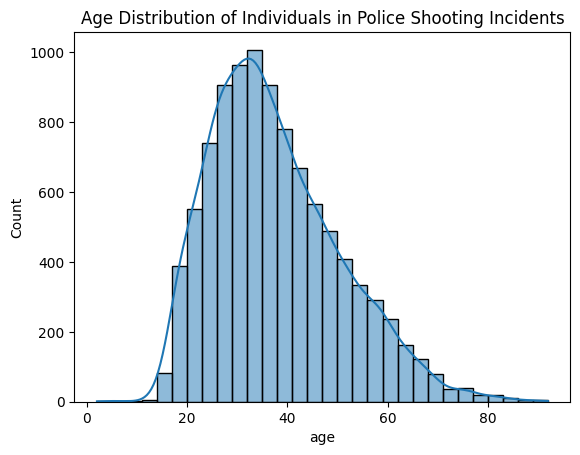

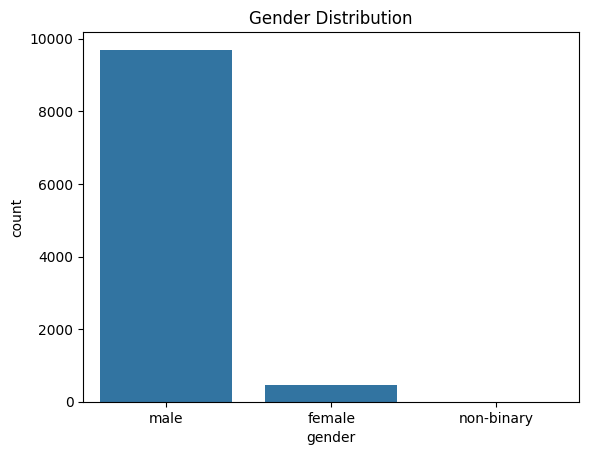

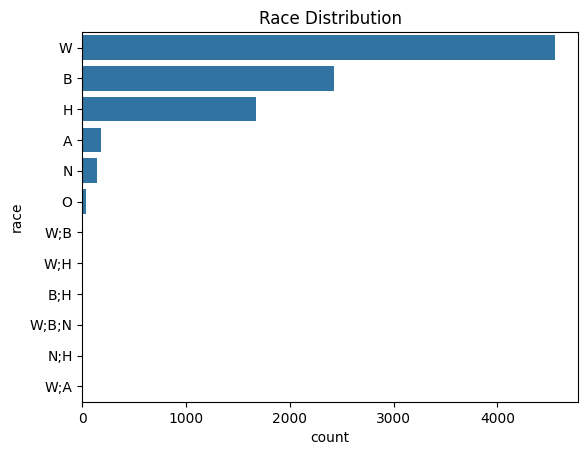

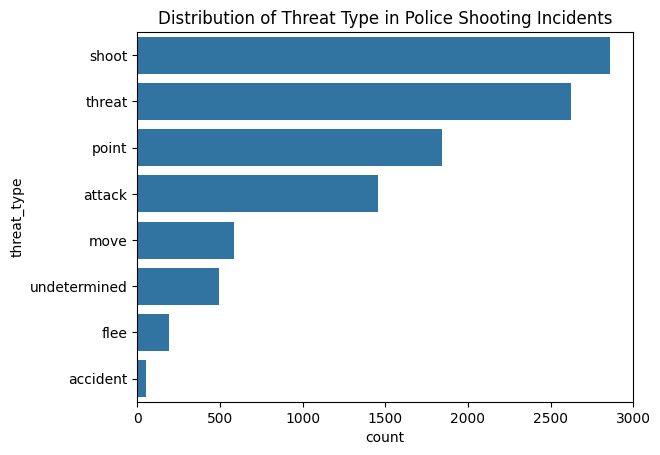

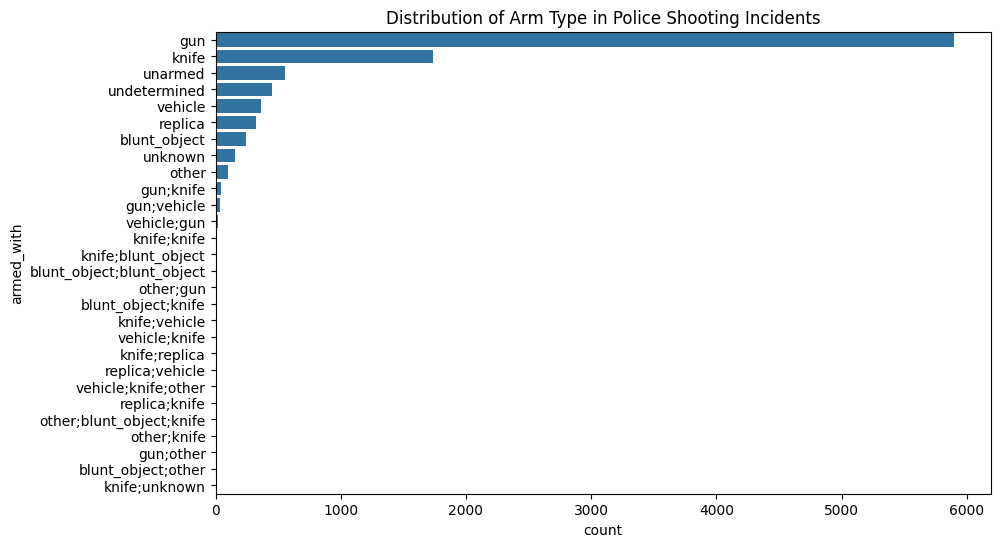

In [17]:
plt.figure()
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution of Individuals in Police Shooting Incidents')

plt.figure()
sns.countplot(x='gender', data=data)
plt.title('Gender Distribution')

plt.figure()
sns.countplot(y='race', data=data, order=data['race'].value_counts().index)
plt.title('Race Distribution')

plt.figure()
sns.countplot(y='threat_type', data=data, order=data['threat_type'].value_counts().index)
plt.title('Distribution of Threat Type in Police Shooting Incidents')

plt.figure(figsize=(10, 6))
sns.countplot(y='armed_with', data=data, order=data['armed_with'].value_counts().index)
plt.title('Distribution of Arm Type in Police Shooting Incidents')

Crimes committed by minors:


183


Weapon possession among individuals under 18:


,count
armed_with,
gun,88
knife,25
unarmed,20
replica,18
vehicle,10
undetermined,10
blunt_object,2
unknown,2
gun;knife,2


Text(0.5, 1.0, 'Armed Status of Individuals Under 18')

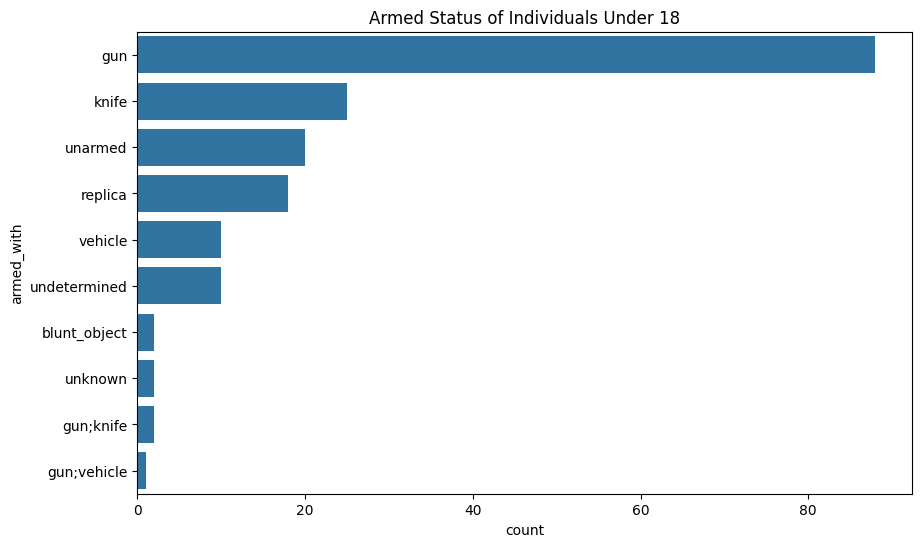

In [18]:
under_18_cases = data[data['age'] < 18]
print("Crimes committed by minors:") 
display(under_18_cases.shape[0])

under_18_with_gun = under_18_cases['armed_with'].value_counts()
print("\nWeapon possession among individuals under 18:")
display(pd.DataFrame(under_18_with_gun))

plt.figure(figsize=(10, 6))
sns.countplot(data=under_18_cases, y='armed_with', order=under_18_cases['armed_with'].value_counts().index)
plt.title('Armed Status of Individuals Under 18')

Cases where criminal had gun but not fled:
3128


Text(0.5, 1.0, 'Flee Status vs Armed Status')

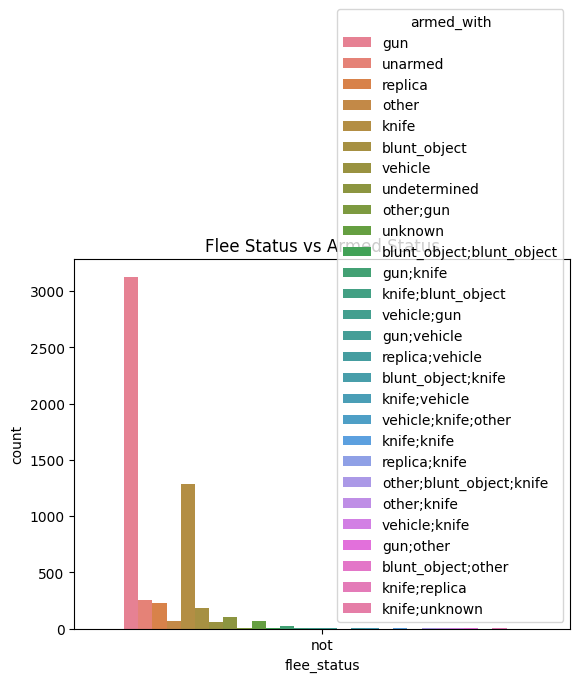

In [19]:
print("Cases where criminal had gun but not fled:")
print(data[(data['flee_status'] == 'not') & (data['armed_with'] == 'gun')].shape[0])

plt.figure()
sns.countplot(data=data, x='flee_status', hue='armed_with', order=['not'])
plt.title('Flee Status vs Armed Status')

In [20]:
data_geo = data
data_geo = data_geo.loc[ ~data_geo.isnull().any(axis=1) ]
print("isnull: \n" , data_geo.isnull().sum())

isnull: 
 id                            0
date                          0
threat_type                   0
flee_status                   0
armed_with                    0
city                          0
county                        0
state                         0
latitude                      0
longitude                     0
location_precision            0
name                          0
age                           0
gender                        0
race                          0
race_source                   0
was_mental_illness_related    0
body_camera                   0
agency_ids                    0
dtype: int64


/home/omarf/Project/remote_venv/EEE_4710_venv/Hands-on-Machine-Learning-with-Python/.venv/lib/python3.12/site-packages/numpy/lib/function_base.py:3710: RuntimeWarning: invalid value encountered in divide
  return sin(y)/y


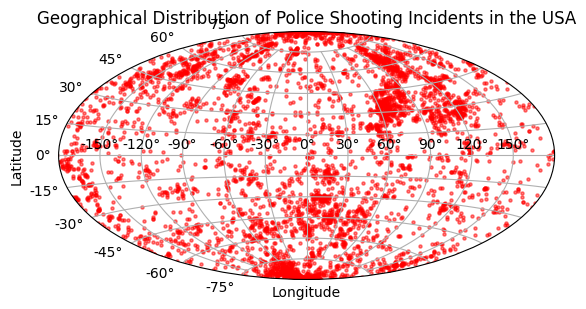

In [37]:
# Plot the geographical co-ordinates data to show where exactly the incidents took place.
plt.figure()
plt.subplot(projection="aitoff")
plt.grid(True)
plt.scatter(data['longitude'], data['latitude'], alpha=0.5, color='red', s=5)
plt.title('Geographical Distribution of Police Shooting Incidents in the USA')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Removing Irrelevant Feature

In [22]:
data_new = data.drop(['name', 'race_source', 'agency_ids'], axis=1)
data_new.head()

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,age,gender,race,was_mental_illness_related,body_camera
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,53.0,male,A,True,False
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,47.0,male,W,False,False
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,23.0,male,H,False,False
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,32.0,male,W,True,False
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,39.0,male,H,False,False


# Converting Categorical to Numerical

## Converting Multi '**armed_with**' with **One Hot Encoding**

- Replacing missing data of '**armed_with**' with '**unknown**'

In [23]:
armed_with_column = object_columns.iloc[object_columns.index == 'armed_with']
data_new.loc[
    data_new[ 'armed_with' ].isnull().values , 
    'armed_with'
    ] = 'unknown'
armed_with = data_new['armed_with'].values

print('Number of missing values in armed_with:')
print(data_new['armed_with'].isnull().sum())
# print(armed_with)


Number of missing values in armed_with:
0


- collecting the options

In [24]:
armed_with.tolist()
split_lst = [item.split(';') for item in armed_with.tolist()]
split_lst = [item for sublist in split_lst for item in sublist]

armed_with_encode_names = np.unique(split_lst)
armed_with_encode_names

array(['blunt_object', 'gun', 'knife', 'other', 'replica', 'unarmed',
       'undetermined', 'unknown', 'vehicle'], dtype='<U12')

- making the options into boolean features

In [25]:
armed_with = np.array(armed_with.tolist())
print(armed_with)
for item in armed_with_encode_names:
    b = np.char.find(armed_with, item) == 0
    data_new[item] = b

data_new.head()

['gun' 'gun' 'unarmed' ... 'undetermined' 'undetermined' 'unknown']


,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,...,body_camera,blunt_object,gun,knife,other,replica,unarmed,undetermined,unknown,vehicle
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,...,False,False,True,False,False,False,False,False,False,False
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,...,False,False,True,False,False,False,False,False,False,False
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,...,False,False,False,False,False,False,True,False,False,False
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,...,False,False,False,False,False,True,False,False,False,False
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,...,False,False,False,False,True,False,False,False,False,False


- **undetermined** and	**unknown** are same. so combine them. into **unknown**

In [26]:
data_new['unknown'] = data_new['unknown'] & data_new['undetermined']
data_new.head()

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,...,body_camera,blunt_object,gun,knife,other,replica,unarmed,undetermined,unknown,vehicle
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,...,False,False,True,False,False,False,False,False,False,False
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,...,False,False,True,False,False,False,False,False,False,False
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,...,False,False,False,False,False,False,True,False,False,False
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,...,False,False,False,False,False,True,False,False,False,False
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,...,False,False,False,False,True,False,False,False,False,False


- **Drop** the columns **armed_with** and **undetermined**

In [27]:
data_new = data_new.drop([ 'armed_with', 'undetermined'], axis=1)
pd.DataFrame(data_new.dtypes)

,0
id,int64
date,object
threat_type,object
flee_status,object
city,object
county,object
state,object
latitude,float64
longitude,float64
location_precision,object


## Converting Multi '**race**' with **One Hot Encoding**

- Replacing missing data of '**race**' with '**U**' as unknown

In [28]:
race_column = object_columns.iloc[object_columns.index == 'race']
data_new.loc[
    data_new[ 'race' ].isnull().values , 
    'race'
    ] = 'U'
race = data_new['race'].values

print('Number of missing values in race:')
print(data_new['race'].isnull().sum())
# print(armed_with)


Number of missing values in race:
0


- collecting the options

In [29]:
race.tolist()
split_lst = [item.split(';') for item in race.tolist()]
split_lst = [item for sublist in split_lst for item in sublist]

race_encode_names = np.unique(split_lst)
race_encode_names

array(['A', 'B', 'H', 'N', 'O', 'U', 'W'], dtype='<U1')

In [30]:
options = np.char.add( 'race_', race_encode_names)
options

array(['race_A', 'race_B', 'race_H', 'race_N', 'race_O', 'race_U',
       'race_W'], dtype='<U6')

- making the options into boolean features

In [31]:
race = np.array(race.tolist())
for item in race_encode_names:
    b = np.char.find(race, item) == 0
    data_new[item] = b

data_new[ options ] = data_new[ race_encode_names]
data_new = data_new.drop( race_encode_names , axis=1)
data_new.head()

,id,date,threat_type,flee_status,city,county,state,latitude,longitude,location_precision,...,unarmed,unknown,vehicle,race_A,race_B,race_H,race_N,race_O,race_U,race_W
0,3,2015-01-02,point,not,Shelton,Mason,WA,47.246826,-123.121592,not_available,...,False,False,False,True,False,False,False,False,False,False
1,4,2015-01-02,point,not,Aloha,Washington,OR,45.487421,-122.891696,not_available,...,False,False,False,False,False,False,False,False,False,True
2,5,2015-01-03,move,not,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,...,True,False,False,False,False,True,False,False,False,False
3,8,2015-01-04,point,not,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,...,False,False,False,False,False,False,False,False,False,True
4,9,2015-01-04,point,not,Evans,Weld,CO,40.383937,-104.692261,not_available,...,False,False,False,False,False,True,False,False,False,False


In [32]:
pd.DataFrame(data_new.dtypes)

,0
id,int64
date,object
threat_type,object
flee_status,object
city,object
county,object
state,object
latitude,float64
longitude,float64
location_precision,object


## '**date**' into **Year** , **Month** , **Day**

In [33]:
dates = data_new['date'].apply(lambda x: x.split('-')).tolist()
dates = pd.DataFrame(dates , columns=['year', 'month', 'day']).astype('int64')
data_new = pd.merge(data_new, dates, left_index=True, right_index=True)
data_new.head()

,id,date,threat_type,flee_status,city,county,state,latitude,longitude,location_precision,...,race_A,race_B,race_H,race_N,race_O,race_U,race_W,year,month,day
0,3,2015-01-02,point,not,Shelton,Mason,WA,47.246826,-123.121592,not_available,...,True,False,False,False,False,False,False,2015,1,2
1,4,2015-01-02,point,not,Aloha,Washington,OR,45.487421,-122.891696,not_available,...,False,False,False,False,False,False,True,2015,1,2
2,5,2015-01-03,move,not,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,...,False,False,True,False,False,False,False,2015,1,3
3,8,2015-01-04,point,not,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,...,False,False,False,False,False,False,True,2015,1,4
4,9,2015-01-04,point,not,Evans,Weld,CO,40.383937,-104.692261,not_available,...,False,False,True,False,False,False,False,2015,1,4


- **Drop** Date column

In [34]:
data_new = data_new.drop(['date'], axis=1)
pd.DataFrame(data_new.dtypes)

,0
id,int64
threat_type,object
flee_status,object
city,object
county,object
state,object
latitude,float64
longitude,float64
location_precision,object
age,float64


## Other Categorical Columns

In [35]:
for c in cat_columns.index:
    options = data_new[c].value_counts().index
    options = {x: i for i, x in enumerate(options)}
    options[np.nan] = -1
    display( pd.DataFrame.from_dict(
        options , 
        orient='index' , 
        columns=[c]
        ) )
    data_new[c] = data_new[c].map( options )

,threat_type
shoot,0
threat,1
point,2
attack,3
move,4
undetermined,5
flee,6
accident,7
NaN,-1


,flee_status
not,0
car,1
foot,2
other,3
NaN,-1


,city
Los Angeles,0
Phoenix,1
Houston,2
San Antonio,3
Las Vegas,4
...,...
Seville,3681
Van Buren,3682
Salt River Reservation,3683
Gray Court,3684


,county
Los Angeles,0
Maricopa,1
Harris,2
San Bernardino,3
Jefferson,4
...,...
Owsley,963
Bandera,964
Tooele,965
Andrews,966


,state
CA,0
TX,1
FL,2
AZ,3
GA,4
CO,5
NC,6
OH,7
TN,8
WA,9


,location_precision
not_available,0
block,1
address,2
intersection,3
road,4
poi_small,5
poi_large,6
NaN,-1


,gender
male,0
female,1
non-binary,2
NaN,-1


- Numeric Data

In [36]:
pd.DataFrame(data_new.dtypes)

,0
id,int64
threat_type,int64
flee_status,int64
city,int64
county,int64
state,int64
latitude,float64
longitude,float64
location_precision,int64
age,float64


# Missing data handling